# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: "Bottom-up" approach: Every point is a cluster then they forms clusters with neighbours and this clusters also get merged to give bigger cluster,this processess until single global cluster is formed.

- <b>Divisive </b>: This is a "top-down" approach: Contrary to Agglomerative it starts as a single cluster and subdivided further into lower clusters and finally into single datapoints.


## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm

- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.

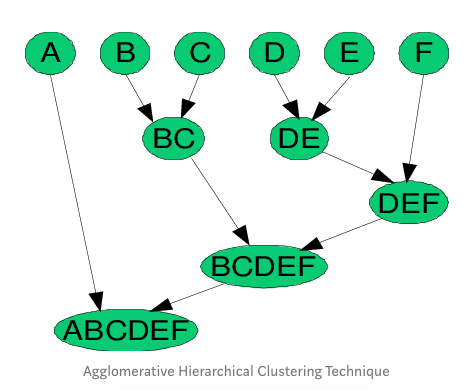


- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

#### Computation of proximity/distance matrix

The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another. For example, in a 2-dimensional space, the distance between the point (1,0) and the origin (0,0) is always 1 according to the usual norms, but the distance between the point (1,1) and the origin (0,0) can be 2 under Manhattan distance, $\sqrt2$ under Euclidean distance, or 1 under maximum distance.

Some commonly used metrics for hierarchical clustering are:

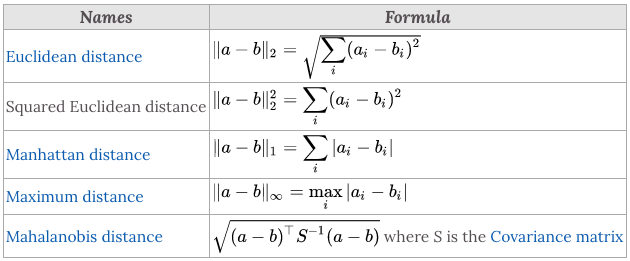

For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.



- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.

The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.


## Distance threshold 
It is the distance in dendrogram on y axis such that above that distance clusters are not merged together, that means this line cuts the vertical lines and those vertical lines corresonds to clusters formed below them, Hence n_clusters paramter should be set to None when distance_threshold is specified.
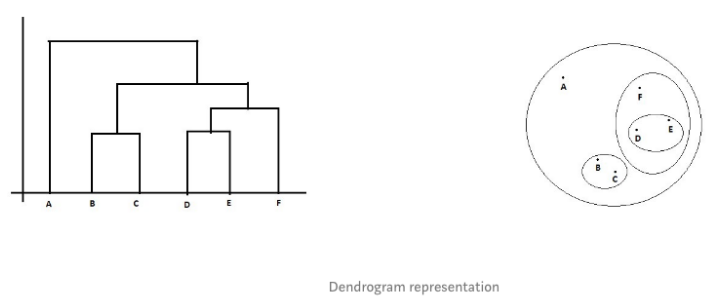

## Dendrograpgs are used to Visualize the Clusters formed by Hierarchy.

# 1. Importing Librabried and Preprocessed Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as scd

In [2]:
data = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/credit_card_preprocessed.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# 2. Standerdization, Normalisation & Dimensionality Reduction

In [3]:
# Standerdization
scalar = StandardScaler()
data = scalar.fit_transform(data)

# Normalisation
data = normalize(data)


# Diamensionality reduction
pca = PCA(n_components = 2)
data = pca.fit_transform(data)

# forming dataframe
data = pd.DataFrame(data)
data.head()

,0,1
0,-0.490443,-0.679237
1,-0.518542,0.545285
2,0.330939,0.269024
3,-0.479448,-0.105320
4,-0.563829,-0.480941


# 3. Hierarchical Clustering

### 3.1 Using the Dendrograms to visualize the data

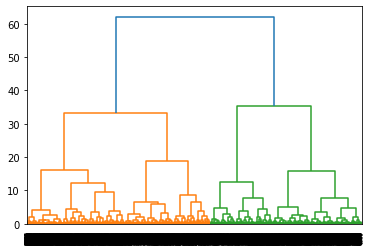

In [4]:
dendrogram = scd.dendrogram(scd.linkage(data, method='ward'))

## 3.2 Using Silhouette score to find number of clusters

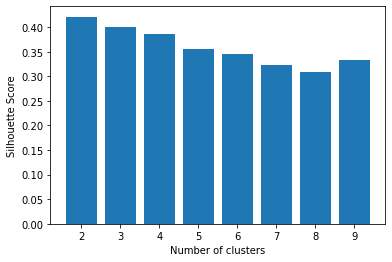

In [13]:
silhouette_scores = []

for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i)
    label = model.fit_predict(data) 
    silhouette_scores.append(silhouette_score(data, label))
    
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

## 3.3 Agglomerative Model

### As we can see from silhouette_scores Number of clusters should be 2 or 3 we take it as 3.


AgglomerativeClustering(
    **n_clusters** = 2,
    *,
    **affinity** = 'euclidean',
    **memory** = None,
    **connectivity** = None,
    **compute_full_tree** = 'auto',
    **linkage** = 'ward',
    **distance_threshold** = None,
    **compute_distances** = False,
)
     
Agglomerative Clustering

Recursively merges the pair of clusters that minimally increases
a given linkage distance.


Parameters
----------
**`n_clusters`** : int or None, default=2
    The number of clusters to find. It must be ``None`` if ``distance_threshold`` is not ``None``.

**`affinity`** : str or callable, default='euclidean'
    Metric used to compute the linkage. 
    1. Can be "euclidean", "l1", "l2",
    2. "manhattan", "cosine", or "precomputed".
    3. If linkage is "ward", only "euclidean" is accepted.
    4. If "precomputed", a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

**`memory`** : str or object with the joblib.Memory interface, default=None
    Used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory.

**`connectivity`** : array-like or callable, default=None
    Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is ``None``, i.e, the hierarchical clustering algorithm is unstructured.

**`compute_full_tree`** : 'auto' or bool, default='auto'
   1. Stop early the construction of the tree at ``n_clusters``. This is useful to decrease                  computation time if the number of clusters is not small compared to the number of samples. This        option is useful only when specifying a connectivity matrix. Note also that when varying the          number of clusters and using caching, it may be advantageous to compute the full tree. 
   2. It must be ``True`` if ``distance_threshold`` is not ``None``. By default `compute_full_tree`          is "auto", which is equivalent to `True` when `distance_threshold` is not `None` or that              `n_clusters  is inferior to the maximum between 100 or `0.02 * n_samples`. Otherwise, "auto" is        equivalent to `False`.

**`linkage`**  : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

    - 'ward' minimizes the variance of the clusters being merged.
    
    - 'average' uses the average of the distances of each observation of
      the two sets.
    
    - 'complete' or 'maximum' linkage uses the maximum distances between
      all observations of the two sets.
    
    - 'single' uses the minimum of the distances between all observations
      of the two sets.

**`distance_threshold`** : float, default=None
    - The linkage distance threshold above which, clusters will not be merged. 
    - If not ``None``, ``n_clusters`` must be ``None`` and ``compute_full_tree`` must be ``True``.

**`compute_distances`** : bool, default=False
    Computes distances between clusters even if `distance_threshold` is not used. This can be used to make dendrogram visualization, but introduces a computational and memory overhead.


Attributes
----------

**`n_clusters_`** : int
    The number of clusters found by the algorithm. If ``distance_threshold=None``, it will be equal to the given ``n_clusters``.

**`labels_`** : ndarray of shape (n_samples)
    cluster labels for each point

**`n_leaves_`** : int
    Number of leaves in the hierarchical tree.

**`n_connected_components_`** : int
    The estimated number of connected components in the graph.

 
**`children_`** : array-like of shape (n_samples-1, 2)
    - The children of each non-leaf node. Values less than `n_samples` correspond to leaves of the tree which are the original samples.
    - A node `i` greater than or equal to `n_samples` is a non-leaf node and has children `children_[i - n_samples]`. 
    - Alternatively at the i-th iteration, children[i][0] and children[i][1] are merged to form node `n_samples + i`

**`distances_`** : array-like of shape (n_nodes-1,)
    Distances between nodes in the corresponding place in `children_`. Only computed if `distance_threshold` is used or `compute_distances` is set to `True`.

In [20]:
agg_model = AgglomerativeClustering(n_clusters=3)
labels = agg_model.fit_predict(data)

## 3.4 Visualising the clusters

In [17]:
data = data.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [18]:
data

array([[-0.49044344, -0.67923693],
       [-0.51854157,  0.54528514],
       [ 0.33093894,  0.26902353],
       ...,
       [ 0.18868542, -0.24860575],
       [-0.313195  , -0.17134591],
       [ 0.01286043,  0.09744286]])

In [21]:
labels

array([1, 2, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
set(labels)

{0, 1, 2}

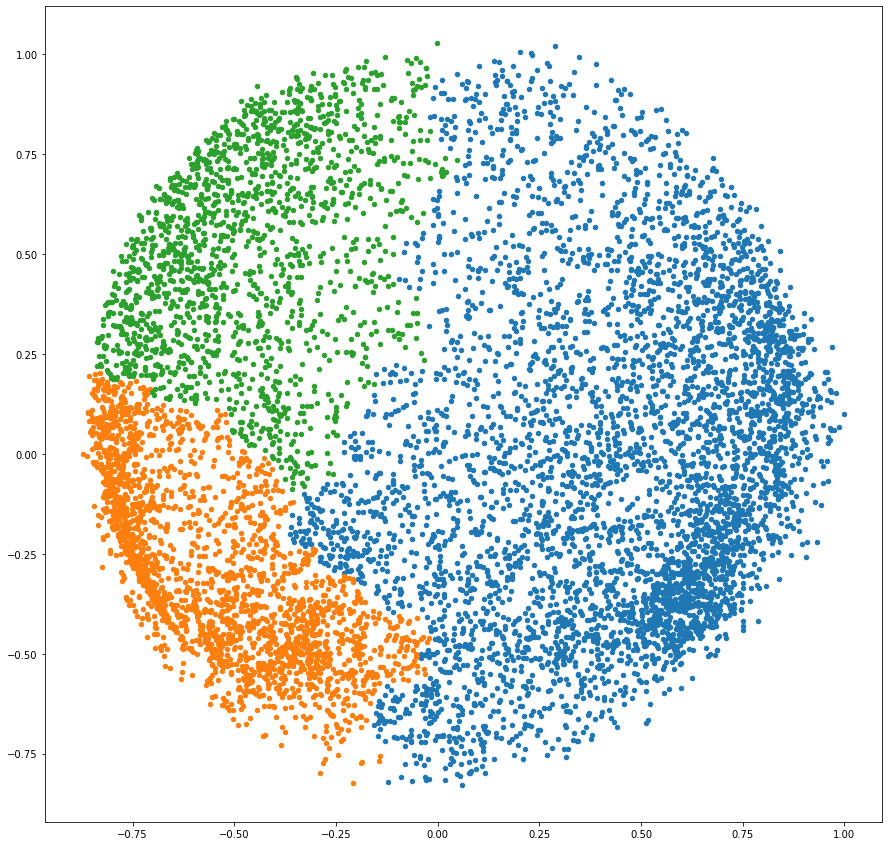

In [32]:
uniq_labels = np.unique(labels)

plt.figure(figsize=(15,15))
for i in uniq_labels:
    plt.scatter(data[labels==i,0], data[labels==i,1], s=20)